In [71]:
import json
import re
import os

In [72]:
def longest_common_substring(s1, s2):
    m = [[0] * (1 + len(s2)) for i in range(1 + len(s1))]
    longest, x_longest = 0, 0
    for x in range(1, 1 + len(s1)):
        for y in range(1, 1 + len(s2)):
            if s1[x - 1] == s2[y - 1]:
                m[x][y] = m[x - 1][y - 1] + 1
                if m[x][y] > longest:
                    longest = m[x][y]
                    x_longest = x
            else:
                m[x][y] = 0
    return s1[x_longest - longest: x_longest]



def evaluate_results(results_filepath):
    data_final = []
    with open(results_filepath, 'r') as f:
        data = json.load(f)
    data_final += data

    i = 1
    p, r = 0, 0
    ac = 0
    for i, item in enumerate(data_final):
        pred = item['pred']
        res = ""

        # pattern = r": *([A-Z, ]+)\." # match the brick names between : and .
        # pattern = r"(?s): *([^:]*[A-Z, ]+)\." # match the brick names between : and .
        # pattern = r": *([A-Za-z, ]+)\."
        # pattern = r": *([A-Za-z, ]+)(\.|$)"
        # pattern2 = r"(?:[:.]) *([A-Za-z, ()*]+)(\.|$)"
        pattern = r': *([A-Z](?![a-z])(?:, *[A-Z](?![a-z]))*)'
        pattern2 = r'(?:[:.]) *([A-Z](?![a-z])(?:, *[A-Z](?![a-z]))*)'
        pattern3 = r'\b[A-Z]\b|(?<![A-Za-z])[A-Z](?![a-z])'

        match = re.search(pattern, item['pred'][-200:])
        if not match:
            match = re.search(pattern2, item['pred'][-200:])
        if not match:
            match = re.search(pattern3, item['pred'][-200:])
            
        if match:
            res = match.group(0)
            res = ''.join(list(filter(lambda x: x.isupper(), res)))
            if len(res)>=2:
                if res[0] == res[1]:
                    res = res[1:] # remove the first letter if it is repeated
            if item['label'][-1] != res[-1]: 
                res += item['label'][-1] # add the last letter of the label (target brick) if it is not already in the prediction
            if res == item['label']:
                # print('correct')
                ac += 1
            else:
                pass
                # print(item['pred'])
                # print(res)
                # print(item['label'])
                # print(f'{i} {item["label"]} \t {res} \t {match.group(0)}')
                # print([item['pred'][-200:]])
            lcs = longest_common_substring(res,item['label'] )
            len(lcs)/len(item['label'])
            len(lcs)/len(res)
            if len(res)==0:
                pass
            r += len(lcs)/len(item['label'])
            if len(res)==0:
                continue
            p += len(lcs)/len(res)
        else:
            # print(f'no answer found in {item["pred"][-200:]}')
            pass

    evaluation = {
        'accuracy': ac/len(data_final),
        'precision': p/len(data_final),
        'recall': r/len(data_final)
    }
    return evaluation
    # acc = ac/len(data_final)
    # print('acc', acc)
    # print(p/len(data_final))
    # print(r/len(data_final))

In [73]:

# models = [
#     'gpt-3.5-turbo',
#     'gpt-4o-mini',
#     'gpt-4o-2024-08-06'
# ]

# for model_name in models:
#     examples_data_dir = '../data/brick_1D_50'
#     results_file_path = os.path.join(examples_data_dir, f'results_{model_name}.json')
#     print(model_name)
#     evaluate_results(results_filepath=results_file_path)

In [74]:
eval = []
results_dir = '../data/results'
# iterate over json files in the results directory
for file in os.listdir(results_dir):
    if file.endswith('.json'):
        results_file_path = os.path.join(results_dir, file)
        evaluation = evaluate_results(results_filepath=results_file_path)
        # add the model name to the evaluation
        evaluation['model'] = file.split('_')[-1].strip('.json')
        # add the dimension to the evaluation
        if '1D' in file:
            evaluation['dimension'] = '1D'
        elif '2D' in file:
            evaluation['dimension'] = '2D'
        else:
            evaluation['dimension'] = ''
        # add the modality to the evaluation
        if 'text' in file or 'txt' in file:
            evaluation['modality'] = 'text'
        elif 'image' in file or 'img' in file:
            evaluation['modality'] = 'image'
        elif 'both' in file:
            evaluation['modality'] = 'both'
        else:
            evaluation['modality'] = ''
        # add color to the evaluation
        if 'color' in file:
            evaluation['color'] = 'color'
        elif 'bw' in file:
            evaluation['color'] = 'bw'
        else:
            evaluation['color'] = ''
        eval.append(evaluation)
print(eval)


[{'accuracy': 0.82, 'precision': 0.8870555555555558, 'recall': 0.8551904761904764, 'model': 'gpt-4o-mini', 'dimension': '1D', 'modality': 'image', 'color': 'bw'}, {'accuracy': 0.7, 'precision': 0.9, 'recall': 0.7405714285714287, 'model': 'gpt-4o-2024-08-06', 'dimension': '1D', 'modality': 'both', 'color': 'bw'}, {'accuracy': 0.8, 'precision': 0.9130079365079363, 'recall': 0.8881111111111112, 'model': 'gpt-4o-mini', 'dimension': '1D', 'modality': 'both', 'color': 'color'}, {'accuracy': 0.2, 'precision': 0.6264275724275723, 'recall': 0.548142857142857, 'model': 'gpt-4o-2024-08-06', 'dimension': '2D', 'modality': 'both', 'color': 'color'}, {'accuracy': 0.22, 'precision': 0.655642857142857, 'recall': 0.6835714285714285, 'model': 'gpt-4o-mini', 'dimension': '2D', 'modality': 'text', 'color': ''}, {'accuracy': 0.54, 'precision': 0.820452380952381, 'recall': 0.7095238095238094, 'model': 'gpt-3.5-turb', 'dimension': '1D', 'modality': 'text', 'color': ''}, {'accuracy': 0.0, 'precision': 0.27161

In [75]:
import pandas as pd

df = pd.DataFrame(eval)
df

,accuracy,precision,recall,model,dimension,modality,color
0,0.82,0.887056,0.855190,gpt-4o-mini,1D,image,bw
1,0.70,0.900000,0.740571,gpt-4o-2024-08-06,1D,both,bw
2,0.80,0.913008,0.888111,gpt-4o-mini,1D,both,color
3,0.20,0.626428,0.548143,gpt-4o-2024-08-06,2D,both,color
4,0.22,0.655643,0.683571,gpt-4o-mini,2D,text,
5,0.54,0.820452,0.709524,gpt-3.5-turb,1D,text,
6,0.00,0.271618,0.436333,gpt-4o-mini,2D,image,color
7,0.82,0.864167,0.859667,gpt-4o-mini,1D,both,bw
8,0.38,0.866302,0.638136,gpt-4o-mini,1D,text,
9,0.26,0.448835,0.719833,gpt-4o-2024-08-06,2D,image,bw


<Axes: title={'center': 'Accuracy by model'}, xlabel='model'>

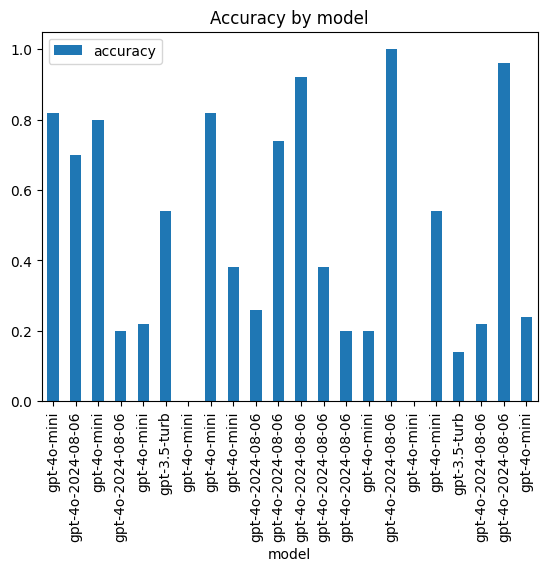

In [88]:
df.plot(kind='bar', x='model', y='accuracy', title='Accuracy by model')

In [99]:
df_latex = df.copy()
df_latex['accuracy'] = df_latex['accuracy'].apply(lambda x: f'{x*100:.1f}')
df_latex['precision'] = df_latex['precision'].apply(lambda x: f'{x*100:.1f}')
df_latex['recall'] = df_latex['recall'].apply(lambda x: f'{x*100:.1f}')
# df_latex.to_latex('results.tex', index=False,multicolumn=True)
df_latex.sort_values(by=['model','dimension','modality'], ascending=False, inplace=True)

In [90]:
# Pivoting the dataframe
# pivot_df = df_latex.pivot_table(index=['dimension', 'modality', 'color'], 
#                           columns='model', 
#                           values=['accuracy', 'precision', 'recall'],
#                           aggfunc='first')

# # Reordering columns to match the desired output format
# pivot_df = pivot_df.reorder_levels([1, 0], axis=1)
# pivot_df = pivot_df.sort_index(axis=1, level=0)

# pivot_df
# pivot_df.to_latex('results.tex', index=True, multicolumn=True, multirow=True)

model                    gpt-3.5-turb                  gpt-4o-2024-08-06  \
                             accuracy precision recall          accuracy   
dimension modality color                                                   
1D        both     bw             NaN       NaN    NaN              70.0   
                   color          NaN       NaN    NaN              74.0   
          image    bw             NaN       NaN    NaN              96.0   
                   color          NaN       NaN    NaN             100.0   
          text                   54.0      82.0   71.0              92.0   
2D        both     bw             NaN       NaN    NaN              22.0   
                   color          NaN       NaN    NaN              20.0   
          image    bw             NaN       NaN    NaN              26.0   
                   color          NaN       NaN    NaN              20.0   
          text                   14.0      37.7   46.8              38.0   

model                                     gpt-4o-mini                   
                         precision recall    accuracy precision recall  
dimension modality color                                                
1D        both     bw         90.0   74.1        82.0      86.4   86.0  
                   color      91.8   78.8        80.0      91.3   88.8  
          image    bw        100.0   96.6        82.0      88.7   85.5  
                   color     100.0  100.0        54.0      71.8   63.6  
          text                99.6   98.3        38.0      86.6   63.8  
2D        both     bw         69.6   57.2        20.0      44.6   63.7  
                   color      62.6   54.8        24.0      45.7   64.0  
          image    bw         44.9   72.0         0.0      29.5   48.3  
                   color      40.7   64.3         0.0      27.2   43.6  
          text                75.0   78.0        22.0      65.6   68.4

In [101]:
# Pivot the dataframe
pivot_df = df_latex.pivot_table(index=['dimension', 'modality', 'color'], 
                          columns='model', 
                          values=['accuracy', 'precision', 'recall'],
                          aggfunc='first')

# Reordering the MultiIndex columns to have 'gpt-4o-2024-08-06' first, then 'gpt-4o-mini', and finally 'gpt-3.5-turb'
pivot_df = pivot_df.reorder_levels([1, 0], axis=1)

# Specifying the desired order for the columns
desired_order = [
    ('gpt-4o-2024-08-06', 'accuracy'),
    ('gpt-4o-2024-08-06', 'precision'),
    ('gpt-4o-2024-08-06', 'recall'),
    ('gpt-4o-mini', 'accuracy'),
    ('gpt-4o-mini', 'precision'),
    ('gpt-4o-mini', 'recall'),
    ('gpt-3.5-turb', 'accuracy'),
    ('gpt-3.5-turb', 'precision'),
    ('gpt-3.5-turb', 'recall')
]

# Reindex the columns using the desired order
pivot_df = pivot_df[desired_order]

pivot_df.columns = pd.MultiIndex.from_tuples(desired_order)

pivot_df = pivot_df.reindex(['text', 'image', 'both'], level='modality')

pivot_df.to_latex('results.tex', index=True, multicolumn=True, multirow=True)

pivot_df

gpt-4o-2024-08-06                  gpt-4o-mini  \
                                  accuracy precision recall    accuracy   
dimension modality color                                                  
1D        text                        92.0      99.6   98.3        38.0   
          image    bw                 96.0     100.0   96.6        82.0   
                   color             100.0     100.0  100.0        54.0   
          both     bw                 70.0      90.0   74.1        82.0   
                   color              74.0      91.8   78.8        80.0   
2D        text                        38.0      75.0   78.0        22.0   
          image    bw                 26.0      44.9   72.0         0.0   
                   color              20.0      40.7   64.3         0.0   
          both     bw                 22.0      69.6   57.2        20.0   
                   color              20.0      62.6   54.8        24.0   

                                          gpt-3.5-turb                   
                         precision recall     accuracy precision recall  
dimension modality color                                                 
1D        text                86.6   63.8         54.0      82.0   71.0  
          image    bw         88.7   85.5          NaN       NaN    NaN  
                   color      71.8   63.6          NaN       NaN    NaN  
          both     bw         86.4   86.0          NaN       NaN    NaN  
                   color      91.3   88.8          NaN       NaN    NaN  
2D        text                65.6   68.4         14.0      37.7   46.8  
          image    bw         29.5   48.3          NaN       NaN    NaN  
                   color      27.2   43.6          NaN       NaN    NaN  
          both     bw         44.6   63.7          NaN       NaN    NaN  
                   color      45.7   64.0          NaN       NaN    NaN

In [102]:
pivot_df

gpt-4o-2024-08-06                  gpt-4o-mini  \
                                  accuracy precision recall    accuracy   
dimension modality color                                                  
1D        text                        92.0      99.6   98.3        38.0   
          image    bw                 96.0     100.0   96.6        82.0   
                   color             100.0     100.0  100.0        54.0   
          both     bw                 70.0      90.0   74.1        82.0   
                   color              74.0      91.8   78.8        80.0   
2D        text                        38.0      75.0   78.0        22.0   
          image    bw                 26.0      44.9   72.0         0.0   
                   color              20.0      40.7   64.3         0.0   
          both     bw                 22.0      69.6   57.2        20.0   
                   color              20.0      62.6   54.8        24.0   

                                          gpt-3.5-turb                   
                         precision recall     accuracy precision recall  
dimension modality color                                                 
1D        text                86.6   63.8         54.0      82.0   71.0  
          image    bw         88.7   85.5          NaN       NaN    NaN  
                   color      71.8   63.6          NaN       NaN    NaN  
          both     bw         86.4   86.0          NaN       NaN    NaN  
                   color      91.3   88.8          NaN       NaN    NaN  
2D        text                65.6   68.4         14.0      37.7   46.8  
          image    bw         29.5   48.3          NaN       NaN    NaN  
                   color      27.2   43.6          NaN       NaN    NaN  
          both     bw         44.6   63.7          NaN       NaN    NaN  
                   color      45.7   64.0          NaN       NaN    NaN